In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

data_modeling.h5 is the dataset merged and cleaned in the previous notebook.

In [3]:
store = pd.HDFStore('all_data.h5')
data = store['all_data']

Perform Treatment to the Orig_Date and Report_Date so that month and year is 

In [4]:
data.drop('Orig_Date', inplace=True, axis=1)
data.drop('report_date', inplace=True, axis=1)
data.drop('orig_date', inplace=True, axis=1)

Perform Treatment to the dti


In [5]:
data.loc[(data.platform_id == 'C'),'dti']=data['dti']-data['loan_over_income']
data['post_dti'] =  data['dti'] + data['loan_over_income']

In [6]:
data.head(5)

,unique_id,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,loan_status,mob,bom,ppmt,ipmt,co_amt,prepay_amt,eom,prepay,default,post_dti
0,A-243811-1,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,current,45,6804.477673,388.156044,81.993956,0.0,0.0,6416.321629,0,0,0.4564
1,A-89475-2,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,paid_off,36,198.001430,198.001430,1.978364,0.0,0.0,0.000000,0,0,0.3905
2,A-383194-3,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,paid_off,36,173.563628,173.563628,1.632051,0.0,0.0,0.000000,0,0,0.1611
3,A-97928-4,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,paid_off,37,1.524140,1.524140,0.024120,0.0,0.0,0.000000,0,0,0.2005
4,A-257581-5,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,paid_off,36,758.868293,758.868293,5.792695,0.0,0.0,0.000000,0,0,0.3857


In [7]:
X = data.drop(['default', 'prepay','unique_id', 'loan_status','bom','eom','ppmt','ipmt','prepay_amt','co_amt'], axis=1)
X_mob = X['mob']
X = X.drop('mob', axis=1)
y_default = data['default']
y_prepay = data['prepay']

In [8]:
X.head(5)

,loan_amount,monthly_payment,grade,income,inq_last_6m,num_open_accts,revol_bal,num_tot_accts,tot_credit_bal,accts_opn_last_6m,inq_last_12m,accts_opn_last_24m,employment_length,home_ownership,int_rate,earliest_cr_line,fico,util_rate,loan_over_income,term,dti,platform_id,post_dti
0,20000.0,470.15,C,75000.0,0.0,15.0,35435.0,25.0,42760.0,0.0,1.0,4.0,3,RENT,14.46,83.0,667.0,76.0,0.27,60,0.1864,A,0.4564
1,6025.0,200.09,C,70000.0,3.0,21.0,8640.0,42.0,100312.0,3.0,6.0,6.0,10,MORTGAGE/OWN,11.99,98.0,682.0,31.2,0.09,36,0.3005,A,0.3905
2,5450.0,173.72,B,70000.0,0.0,6.0,5746.0,24.0,119491.0,0.0,4.0,6.0,10,MORTGAGE/OWN,9.16,188.0,687.0,56.9,0.08,36,0.0811,A,0.1611
3,6725.0,246.48,D,55000.0,1.0,6.0,8551.0,12.0,287319.0,1.0,5.0,4.0,8,MORTGAGE/OWN,18.99,82.0,662.0,77.7,0.12,36,0.0805,A,0.2005
4,24000.0,764.99,B,125000.0,0.0,22.0,33290.0,47.0,305776.0,0.0,0.0,3.0,5,MORTGAGE/OWN,9.16,84.0,682.0,80.2,0.19,36,0.1957,A,0.3857


In [10]:
encoder_1 = LabelEncoder()

# Fit the encoder on the data "platform_id"
encoder_1.fit(X["platform_id"])
X_platform_id_encoded = encoder_1.transform(X["platform_id"])
X["platform_id"] = X_platform_id_encoded

# Fit the encoder on the data "grade"
encoder_2 = LabelEncoder()
encoder_2.fit(X["grade"])
X_grade_encoded = encoder_2.transform(X["grade"])
X["grade"] = X_grade_encoded

# Fit the encoder on the data "home_ownership"
encoder_3 = LabelEncoder()
encoder_3.fit(X["home_ownership"])
X_home_ownership_encoded = encoder_3.transform(X["home_ownership"])
X["home_ownership"] = X_home_ownership_encoded

1. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial.
2. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case.

LDA Regression

Eigenvalues:
[4.03041783 2.75629688 2.02473292 1.70551465 1.25088552 1.11572715
 1.04074729 1.0006187  0.99688656 0.9754057  0.94421805 0.83591329
 0.7956282  0.67474409 0.61982667 0.46722729 0.4293602  0.41221433
 0.31596453 0.26965926 0.24438168 0.0797319  0.01393569]

Variances (Percentage):
[17.52352653 11.98387948  8.80317192  7.41526869  5.4386236   4.85097951
  4.52498068  4.35050881  4.33428217  4.24088729  4.105289    3.63439956
  3.45924726  2.93366506  2.69489408  2.03141961  1.86678036  1.79223325
  1.37375653  1.17242963  1.06252726  0.34665986  0.06058988]



Text(0, 0.5, 'Explained variance (%)')

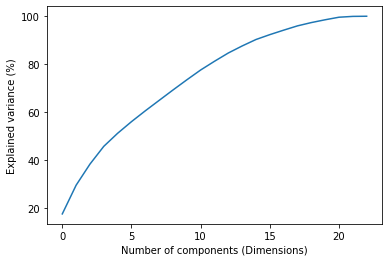

In [11]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

Logistic Regression

In [12]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X.fillna(0))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components= 11)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0  0.717521 -0.458524  1.433562  1.046494  0.164595 -0.072055 -0.030477   
1  2.244616 -1.030425 -2.443468 -0.576140  0.748542 -0.115527  1.318192   
2  0.310954  0.027425 -1.540056  0.840923 -0.836991 -0.101286  0.769092   
3  0.383023 -1.832473 -0.242715  0.706981 -0.896038  0.766941  0.857497   
4  2.691928  1.549250  1.128812  1.238563 -0.146378  0.364322  1.418887   

         7         8         9         10  
0 -0.168625 -0.026212  0.399204 -0.980749  
1  0.025524  0.144284 -0.892829  0.537241  
2  0.116545  0.204194 -0.554330  0.878635  
3  0.164902  0.243484 -0.455246  1.471685  
4 -0.103755  0.294065 -0.282789 -1.066466  

Size: 
(599303, 11)


In [ ]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(X_pca.corr(), 
            annot=True)

In [13]:
store = pd.HDFStore('X_pca.h5')
store['X_pca'] = X_pca  # save it

store = pd.HDFStore('X_mob.h5')
store['X_mob'] = X_mob  # save it

store = pd.HDFStore('y_default.h5')
store['y_default'] = y_default  # save it

store = pd.HDFStore('y_prepay.h5')
store['y_prepay'] = y_prepay  # save it
